# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import pickle

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 2. Read Train and Test data

In [2]:
train = pd.read_csv("data/train.csv", index_col = 0)

In [3]:
train.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_ID,,,,,,,,,,,,,,
0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [4]:
train.shape

(39499, 14)

In [5]:
train.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


In [6]:
train.isnull().sum()

Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [7]:
test = pd.read_csv("data/test.csv", index_col=0)

In [8]:
test.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
Property_ID,,,,,,,,,,,,,
0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52
0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16
0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92
0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45
0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72


In [9]:
test.shape

(10500, 13)

In [10]:
test.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
count,10500.000000,10055.000000,10500.000000,10134.000000,10500.000000,10500.000000,10500.000000
mean,1364.333333,3.897563,2.326571,0.484409,6.361525,120.532571,3.734125
std,1813.702032,2.690162,1.175324,0.749686,1.216237,55.635990,0.793325
min,100.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.020000
25%,505.000000,2.000000,1.000000,0.000000,5.620000,95.000000,3.230000
50%,935.500000,3.000000,2.000000,0.000000,6.470000,113.000000,3.850000
75%,1758.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.220000
max,27477.000000,15.000000,6.000000,3.000000,9.430000,1031.000000,5.000000


In [11]:
test.isnull().sum()

Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

# 3. Handle Missing Value

In [12]:
mode_for_windows = train['Number_of_Windows'].mode()[0]

In [13]:
train['Number_of_Windows'].fillna(mode_for_windows, inplace = True)

In [14]:
test['Number_of_Windows'].fillna(mode_for_windows, inplace = True)

In [15]:
train.bfill(inplace=True)

In [16]:
test.bfill(inplace=True)

In [17]:
train.isnull().sum()

Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [18]:
test.isnull().sum()

Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
dtype: int64

# 4. Features Handling 

# Property type enocoding

In [19]:
train['Property_Type'].value_counts()

Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64

<AxesSubplot:>

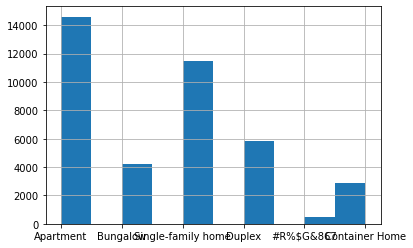

In [20]:
train['Property_Type'].hist()

In [21]:
Property_Type_encoder = OneHotEncoder()
Property_Type_encoder.fit(train[['Property_Type']])

OneHotEncoder()

In [22]:
Property_Type_encoder_column_names = Property_Type_encoder.get_feature_names(['Property_Type'])

In [23]:
Property_Type_encoder_column_names

array(['Property_Type_#R%$G&867', 'Property_Type_Apartment',
       'Property_Type_Bungalow', 'Property_Type_Container Home',
       'Property_Type_Duplex', 'Property_Type_Single-family home'],
      dtype=object)

In [24]:
encoded_data = pd.DataFrame(Property_Type_encoder.transform(train[['Property_Type']]).toarray(), 
                            columns = Property_Type_encoder_column_names, index = train.index)

In [25]:
train = pd.concat([train, encoded_data], axis=1)

In [26]:
train.drop('Property_Type', axis=1, inplace=True)

In [27]:
train.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
Property_ID,,,,,,,,,,,,,,,,,,,
0x21e3,106,4.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98,0.0,1.0,0.0,0.0,0.0,0.0
0x68d4,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20,0.0,1.0,0.0,0.0,0.0,0.0
0x7d81,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39,0.0,1.0,0.0,0.0,0.0,0.0
0x7a57,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46,0.0,1.0,0.0,0.0,0.0,0.0
0x9409,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
encoded_data = pd.DataFrame(Property_Type_encoder.transform(test[['Property_Type']]).toarray(), 
                            columns = Property_Type_encoder_column_names, index = test.index)

In [29]:
test['Property_Type'].value_counts()

Apartment             3853
Single-family home    3102
Duplex                1520
Bungalow              1105
Container Home         781
#R%$G&867              139
Name: Property_Type, dtype: int64

In [30]:
test = pd.concat([test, encoded_data], axis=1)

In [31]:
test.drop('Property_Type', axis=1, inplace=True)

In [32]:
test.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
Property_ID,,,,,,,,,,,,,,,,,,
0x6e93,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52,0.0,1.0,0.0,0.0,0.0,0.0
0x8787,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16,0.0,1.0,0.0,0.0,0.0,0.0
0x6c17,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92,0.0,0.0,0.0,1.0,0.0,0.0
0x9dbd,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45,0.0,1.0,0.0,0.0,0.0,0.0
0xbfde,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72,0.0,0.0,1.0,0.0,0.0,0.0


# Property area

In [33]:
train['Property_Area'].min(), train['Property_Area'].max()

(100, 28064)

<AxesSubplot:ylabel='Density'>

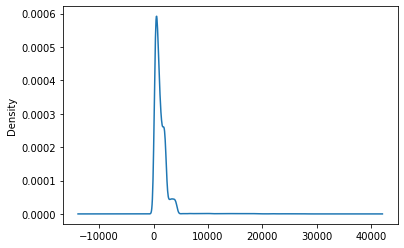

In [34]:
train['Property_Area'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

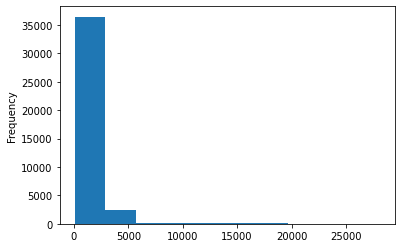

In [35]:
train['Property_Area'].plot.hist(bins=10)

# Number of windows

In [36]:
train['Number_of_Windows'].min(), train['Number_of_Windows'].max()

(0.0, 15.0)

<AxesSubplot:ylabel='Frequency'>

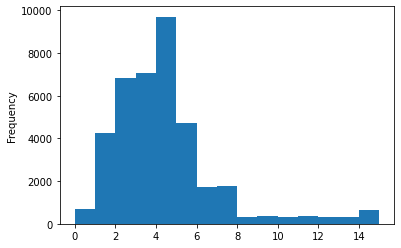

In [37]:
train['Number_of_Windows'].plot.hist(bins=15)

# Number of doors

In [38]:
train['Number_of_Doors'].min(), train['Number_of_Doors'].max()

(1, 6)

<AxesSubplot:ylabel='Frequency'>

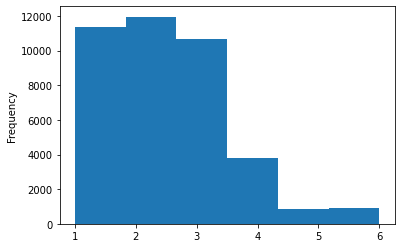

In [39]:
train['Number_of_Doors'].plot.hist(bins=6)

# Furnishing

In [40]:
train['Furnishing'].value_counts()

Semi_Furnished     20926
Unfurnished        10602
Fully Furnished     7971
Name: Furnishing, dtype: int64

In [41]:
furnish_value = {'Furnishing': {'Unfurnished': 0, 'Semi_Furnished': 1, 'Fully Furnished': 2}}

In [42]:
train.replace(furnish_value, inplace = True)

In [43]:
test.replace(furnish_value, inplace = True)

# Frequency of Powercuts

In [44]:
train['Frequency_of_Powercuts'].min(), train['Frequency_of_Powercuts'].max()

(0.0, 3.0)

<AxesSubplot:ylabel='Frequency'>

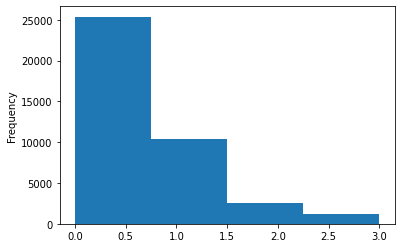

In [45]:
train['Frequency_of_Powercuts'].plot.hist(bins=4)

# Power Backup

In [46]:
train['Power_Backup'].value_counts()

No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64

In [47]:
train.replace({'Power_Backup' : {'No': 0, 'Yes': 1, 'NOT MENTIONED' : 0}}, inplace=True)

In [48]:
test.replace({'Power_Backup' : {'No': 0, 'Yes': 1, 'NOT MENTIONED' : 0}}, inplace=True)

# Water supply encoding

In [49]:
water_supply_encoder = OneHotEncoder()
water_supply_encoder.fit(train[['Water_Supply']])

OneHotEncoder()

In [50]:
water_supply_encoder_column_names = water_supply_encoder.get_feature_names(['Water_Supply'])

In [51]:
water_supply_encoder_column_names

array(['Water_Supply_All time', 'Water_Supply_NOT MENTIONED',
       'Water_Supply_Once in a day - Evening',
       'Water_Supply_Once in a day - Morning',
       'Water_Supply_Once in two days'], dtype=object)

In [52]:
encoded_data = pd.DataFrame(water_supply_encoder.transform(train[['Water_Supply']]).toarray(), 
                            columns = water_supply_encoder_column_names, index = train.index)

In [53]:
train = pd.concat([train, encoded_data], axis=1)

In [54]:
train.drop('Water_Supply', axis=1, inplace=True)

In [55]:
train.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,...,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Water_Supply_All time,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days
Property_ID,,,,,,,,,,,,,,,,,,,,,
0x21e3,106,4.0,1,1,0.0,0,5.89,Slightly below average,Medium,90.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0x68d4,733,2.0,2,0,1.0,0,4.37,Well below average,Medium,96.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0x7d81,737,4.0,2,2,0.0,0,7.45,Slightly below average,Medium,121.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0x7a57,900,3.0,2,0,2.0,1,6.16,Well above average,Medium,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0x9409,2238,14.0,6,2,0.0,0,5.46,Well below average,Medium,116.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
encoded_data = pd.DataFrame(water_supply_encoder.transform(test[['Water_Supply']]).toarray(), 
                            columns = water_supply_encoder_column_names, index = test.index)

In [57]:
test = pd.concat([test, encoded_data], axis=1)

In [58]:
test.drop('Water_Supply', axis=1, inplace=True)

# Traffic Density Score

In [59]:
train['Traffic_Density_Score'].min(), train['Traffic_Density_Score'].max()

(0.0, 9.91)

<AxesSubplot:ylabel='Frequency'>

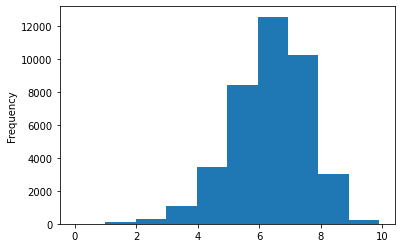

In [60]:
train['Traffic_Density_Score'].plot.hist(bins=10)

# Crime rate

In [61]:
train['Crime_Rate'].value_counts()

Well below average        19864
Slightly below average    11804
Slightly above average     5414
Well above average         2417
Name: Crime_Rate, dtype: int64

In [62]:
crime_rate_values = {'Crime_Rate': {'Well below average': 0, 'Slightly below average': 1, 
                                    'Slightly above average': 2, 'Well above average': 3}}

In [63]:
train.replace(crime_rate_values, inplace=True)

In [64]:
test.replace(crime_rate_values, inplace=True)

# Dust and Noise

In [65]:
train['Dust_and_Noise'].value_counts()

Medium    34057
High       3300
Low        2142
Name: Dust_and_Noise, dtype: int64

In [66]:
dust_values = {'Dust_and_Noise': {'Low': 0, 'Medium': 1, 'High': 2}}

In [67]:
train.replace(dust_values, inplace=True)

In [68]:
test.replace(dust_values, inplace=True)

# Air Quality index

In [69]:
train['Air_Quality_Index'].min(), train['Air_Quality_Index'].max()

(0.0, 1044.0)

<AxesSubplot:ylabel='Density'>

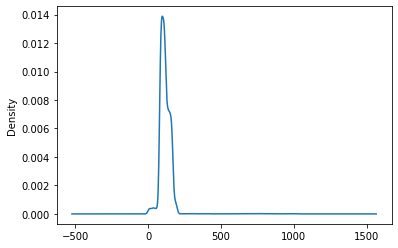

In [70]:
train['Air_Quality_Index'].plot.kde()

# Neighborhood review

In [71]:
train['Neighborhood_Review'].min(), train['Neighborhood_Review'].max()

(0.0, 5.0)

<AxesSubplot:ylabel='Frequency'>

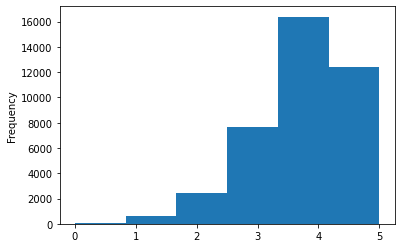

In [72]:
train['Neighborhood_Review'].plot.hist(bins=6)

# 5 Data splitting

In [73]:
x_train = train.drop("Habitability_score", axis=1)
y_train = train["Habitability_score"]

In [74]:
x_train.shape, y_train.shape, test.shape

((39499, 22), (39499,), (10500, 22))

# 6. Data Scaling

In [75]:
y_train.min(), y_train.max()

(7.28, 100.0)

<AxesSubplot:ylabel='Density'>

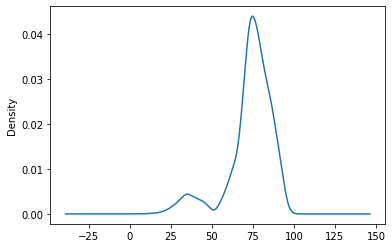

In [76]:
y_train.plot.kde()

In [77]:
y_train = np.log(y_train)

In [78]:
scaler = StandardScaler()

In [79]:
scaler.fit(x_train)

StandardScaler()

In [80]:
feature_columns = x_train.columns
train_index = x_train.index
test_index = test.index

In [81]:
x_train = scaler.transform(x_train)
x_train = pd.DataFrame(x_train, columns = feature_columns, index=train_index)

In [82]:
test = scaler.transform(test)
test = pd.DataFrame(test, columns = feature_columns, index=test_index)

In [83]:
x_train.columns

Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing',
       'Frequency_of_Powercuts', 'Power_Backup', 'Traffic_Density_Score',
       'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index',
       'Neighborhood_Review', 'Property_Type_#R%$G&867',
       'Property_Type_Apartment', 'Property_Type_Bungalow',
       'Property_Type_Container Home', 'Property_Type_Duplex',
       'Property_Type_Single-family home', 'Water_Supply_All time',
       'Water_Supply_NOT MENTIONED', 'Water_Supply_Once in a day - Evening',
       'Water_Supply_Once in a day - Morning',
       'Water_Supply_Once in two days'],
      dtype='object')

# 7. Model Training

In [84]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [85]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

# 8. Prediction

In [86]:
y_pred = model.predict(test)

In [87]:
y_pred = np.exp(y_pred)

In [88]:
y_pred.min(), y_pred.max()

(12.850514, 103.06715)

In [89]:
y_pred[y_pred>100] = 100.0

In [90]:
y_pred.min(), y_pred.max()

(12.850514, 100.0)

# 9. Submission file

In [91]:
sampsub = pd.read_csv("data/sample_submission.csv")

In [92]:
sampsub.head()

,Property_ID,Habitability_score
0,0x21e3,71.98
1,0x68d4,71.20
2,0x7d81,71.39
3,0x7a57,31.46
4,0x9409,93.70


In [93]:
submission = pd.DataFrame({'Property_ID': test.index, "Habitability_score": y_pred})

In [94]:
submission.head()

,Property_ID,Habitability_score
0,0x6e93,27.434000
1,0x8787,79.271606
2,0x6c17,68.196098
3,0x9dbd,71.042786
4,0xbfde,76.603233


In [95]:
submission.to_csv("XGBoost Regressor.csv", index=False)

# 10. Save Model

In [96]:
output = open('model/property_type_model.pkl', 'wb')
pickle.dump(Property_Type_encoder, output)
output.close()

In [97]:
output = open('model/water_supply_model.pkl', 'wb')
pickle.dump(water_supply_encoder, output)
output.close()

In [98]:
output = open('model/scaling_model.pkl', 'wb')
pickle.dump(scaler, output)
output.close()

In [99]:
output = open('model/xgboost_model.pkl', 'wb')
pickle.dump(model, output)
output.close()